In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import matplotlib

from utils import get_block_number_from_timestamp


# Create timestamp - block dataframe
- Timestamp to block_number, closest = before that timestamp, with API from polygonscan, save it to csv to use later
- If timestamp - block number exist, dont repeat API call, polygonscan has limitted api call
- block will be use to query ocean-subgraph later
- Queried every 6 hours, this is also an interval for all historical data queries: global statistics, pools, fixed rate exchange

In [19]:
# timestamp0 = 1653868800 # (GMT): Monday, May 30, 2022 12:00:00 AM
# timestamp1 = 1658534400 # (GMT): Saturday, July 23, 2022 12:00:00 AM
# interval = 21600 # 6 hours

# df_timestamp_block = pd.DataFrame(columns = ['timestamp', 'block'])

# for timestamp in range(timestamp0, timestamp1, interval):
#     block = get_block_number_from_timestamp(timestamp)
#     values = [{
#         "timestamp": timestamp,
#         "block": block
#     }]
#     df_timestamp_block = df_timestamp_block.append(values)
#     time.sleep(0.3)

# # save
# df_timestamp_block.reset_index(inplace = True, drop = True)
# df_timestamp_block.to_csv('./data/timestamp_block.csv', index=False)

In [2]:
# load from queried data
df_timestamp_block =  pd.read_csv('./data/timestamp_block.csv')
df_timestamp_block.head()

,timestamp,block
0,1653868800,28931584
1,1653890400,28941471
2,1653912000,28951494
3,1653933600,28961576
4,1653955200,28971170


# Global statistics
- Overall Ocean markerplace information, including

In [15]:
# df_global_statistics = pd.DataFrame(columns = [
#   'block', 'timestamp',
#   'totalLiquidity.value', 'totalLiquidity.token.address',
#   'datatokenCount', 'fixedCount', 'nftCount', 'poolCount'
# ])

# base_url = "https://v4.subgraph.polygon.oceanprotocol.com"
# route = "/subgraphs/name/oceanprotocol/ocean-subgraph"
# url = base_url + route

# for i in range(df_timestamp_block.shape[0]): 
#   block = df_timestamp_block['block'][i]
#   timestamp = df_timestamp_block['timestamp'][i]
#   query = \
#   f"""
#     {{
#       globalStatistics (
#         block: {{
#           number: {block}
#         }}
#       ) 
#       {{
#         nftCount
#         datatokenCount
#         totalLiquidity {{
#           value
#           token {{
#             address
#           }}
#         }}
#         poolCount
#         fixedCount
#       }}
#     }}
#   """
#   headers = {"Content-Type": "application/json"}
#   payload = json.dumps({"query": query})
#   response = requests.request("POST", url, headers=headers, data=payload)
#   data = json.loads(response.text)

#   df_data = pd.json_normalize(
#     data['data']['globalStatistics'],
#     record_path=['totalLiquidity'],
#     meta=['datatokenCount','fixedCount','nftCount','poolCount']
#   )
#   df_data.rename({'value': 'totalLiquidity.value', 'token.address': 'totalLiquidity.token.address'}, axis=1, inplace=True)
  
#   df_data['block'] = block
#   df_data['timestamp'] = timestamp

#   df_global_statistics = pd.concat([df_global_statistics, df_data], ignore_index=True, sort=False)

# df_global_statistics.to_csv('./data/global_statistics.csv', index=False)

In [16]:
df_global_statistics =  pd.read_csv('./data/global_statistics.csv')
df_global_statistics.head()

,blocknumber,timestamp,totalLiquidity.value,totalLiquidity.token.address,datatokenCount,fixedCount,nftCount,poolCount
0,29294398,1654646400,500.000000,0x282d8efce846a88b159800bd4130ad77443fa1a1,5,1,5,1
1,29304517,1654668000,501.006028,0x282d8efce846a88b159800bd4130ad77443fa1a1,5,1,5,1
2,29314546,1654689600,1355.042209,0x282d8efce846a88b159800bd4130ad77443fa1a1,6,1,6,2
3,29324636,1654711200,1656.059292,0x282d8efce846a88b159800bd4130ad77443fa1a1,7,1,7,3
4,29334792,1654732800,2680.059292,0x282d8efce846a88b159800bd4130ad77443fa1a1,10,1,13,4


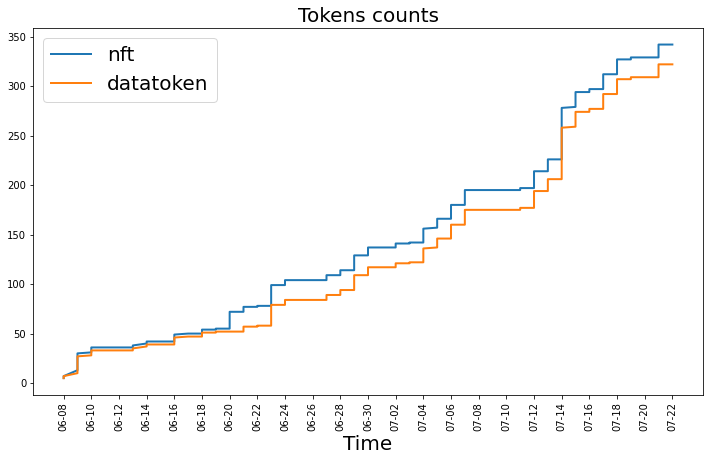

In [4]:
fig, ax = plt.subplots()
x = pd.to_datetime(df_global_statistics["timestamp"], unit='s').dt.strftime('%m-%d')

y = df_global_statistics['nftCount'].astype(float)
plt.plot(x, y, label = 'nft', linewidth=2)

y = df_global_statistics['datatokenCount']
plt.plot(x, y, label = 'datatoken', linewidth=2)




plt.xlabel("Time", fontsize=20)
# plt.ylabel("Number of tokens", fontsize=16)
plt.title(f"Tokens counts", fontsize=20)
plt.xticks(rotation=30)
plt.legend(fontsize=20)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

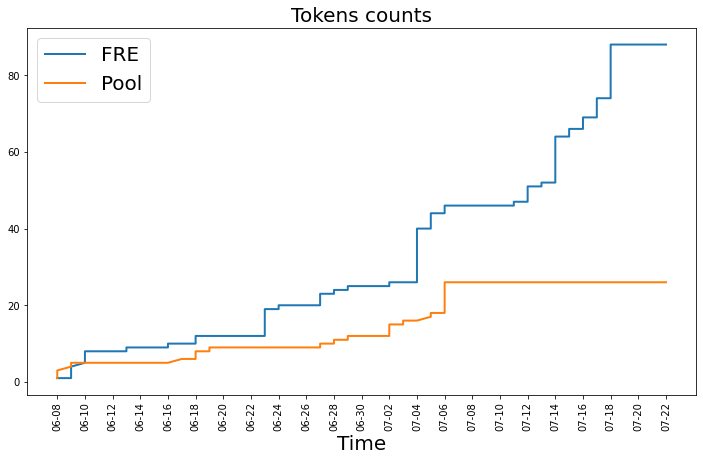

In [18]:
fig, ax = plt.subplots()
x = pd.to_datetime(df_global_statistics["timestamp"], unit='s').dt.strftime('%m-%d')

y = df_global_statistics['fixedCount'].astype(float)
plt.plot(x, y, label = 'FRE', linewidth=2)

y = df_global_statistics['poolCount']
plt.plot(x, y, label = 'Pool', linewidth=2)


plt.xlabel("Time", fontsize=20)
# plt.ylabel("Number of tokens", fontsize=16)
plt.title(f"Tokens counts", fontsize=20)
plt.xticks(rotation=30)
plt.legend(fontsize=20)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

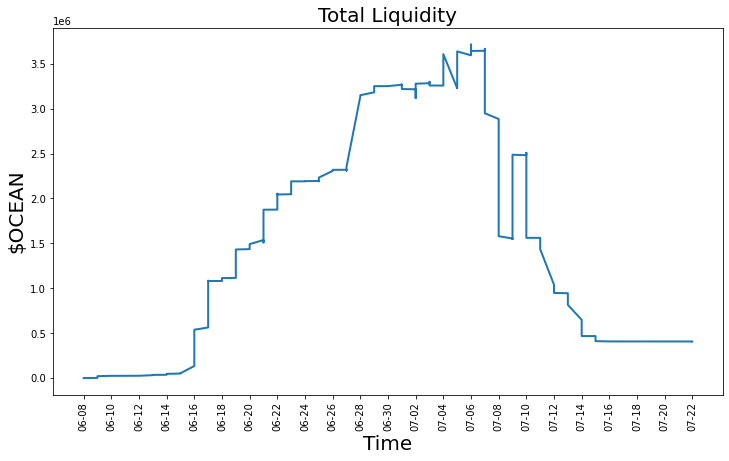

In [5]:
fig, ax = plt.subplots()
x = pd.to_datetime(df_global_statistics["timestamp"], unit='s').dt.strftime('%m-%d')

y = df_global_statistics['totalLiquidity.value'].astype(float)
plt.plot(x, y, label = 'Total Liquidity', linewidth=2)


plt.xlabel("Time", fontsize=20)
plt.ylabel("$OCEAN", fontsize=20)
plt.title(f"Total Liquidity", fontsize=20)
plt.xticks(rotation=30)
# plt.legend(fontsize=10)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

# Datatokens

## Query

In [51]:
# query = \
# """
# {
#   tokens (
#     where: {isDatatoken: true}
#     orderBy: createdTimestamp
#     orderDirection:asc
#     first: 1000
#   ) 
#   {
#     address
#     createdTimestamp
#     block
#     pools {
#       id
#     }
#     fixedRateExchanges {
#       id
#     }
#   }
# }
 
# """
# headers = {"Content-Type": "application/json"}
# payload = json.dumps({"query": query})
# response = requests.request("POST", url, headers=headers, data=payload)

# data = json.loads(response.text)
# df_datatokens = pd.json_normalize(data['data']['tokens'])

## Clean

In [52]:
# df_datatokens['fixedRateExchanges'] = df_datatokens['fixedRateExchanges'].apply(lambda y: y[0]['id'] if len(y)>0 else np.nan)
# df_datatokens['pools'] = df_datatokens['pools'].apply(lambda y: y[0]['id'] if len(y)>0 else np.nan)
# df_datatokens.to_csv('./data/datatokens.csv', index=False)

In [6]:
df_datatokens = pd.read_csv('./data/datatokens.csv')
df_datatokens.head()

,address,block,createdTimestamp,fixedRateExchanges,pools
0,0xb5d8d705524a18056216bf552fa7b473f852bf48,28944565,1653897180,NaN,NaN
1,0x1c5d7f3c7c760d7d47823b0f0369940c71874e95,28979255,1653972787,NaN,NaN
2,0x8b57ed8dcb403125912d4e8a4c15a6d50a517df2,28985213,1653985350,0xb28ab1aade4c75f8cf013136fc0c290aeaea9ba6-0xe...,NaN
3,0xddc5acf6b81520802adbf4f24e05de7fc2cac467,29064268,1654153299,NaN,NaN
4,0xd3e5af97ac3ec333d6410ff807c217b090c88e61,29294034,1654645651,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a


# Pools
- From datatokens list, filter to which datatoken created liquidity pool
- each datatoken with pool, query pool information historically
    '''
    {
    pool (
        id:"0x25faf893edcef3b1c94029f01a088448669fcb9a"
        block: {
        number: 29294040
        }
    ) {
        id
        baseTokenLiquidity
        datatokenLiquidity
        spotPrice
        swapCount
        controller
        joinCount
        exitCount
        transactionCount
        datatoken {
        address
        name
        symbol
        nft {
            creator
            owner
            name
            symbol
            transferable
        }
        }
    }
    }
    '''
- next
  - try with couple pools and block numbers first before query all, graph
  - link datatoken => nft => owner address => project


In [7]:
df_datatokens_pools = df_datatokens.dropna(subset=['pools']).reset_index()
print(f'Number of datatokens which created pool: {df_datatokens_pools.shape[0]}')
df_datatokens_pools.head()

Number of datatokens which created pool: 26


,index,address,block,createdTimestamp,fixedRateExchanges,pools
0,4,0xd3e5af97ac3ec333d6410ff807c217b090c88e61,29294034,1654645651,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a
1,5,0xbf2fac00970223da63affd7a58e6ea5f53a9bf38,29313935,1654688214,NaN,0xbae67c3f5ea82a1c9b1a5c442f5af2d8a80dbf84
2,6,0xdf71733d8d8bc83fb7caf48525716938fa2241e6,29320012,1654701647,NaN,0x2dd64ba8d9b9b1bb402aa70214e1fb1d7af314a1
3,9,0x473851e703c9e7f46e88b6552ddf8f47fd7dd460,29327479,1654717071,NaN,0xa6fe1df0e3ae0aa0d84f4beb0c626add65d971b1
4,26,0xf807ca842d8fb217fcf0a0df8e84e447358c6e86,29349611,1654764650,NaN,0x95f57249e6dd394318025068a8bfc841ac6ec0dd


In [ ]:
# # query the with the first row df_datatokens_pools info, mainly to automaticly get the df columns
# pool_tmp = '"' + str(df_datatokens_pools['pools'][0]) + '"'
# block_tmp = 31001552
# timestamp_tmp = 1658469600

# query = \
# f"""
#             {{
#     pool (
#         id: {pool_tmp}
#         block: {{
#         number: {block_tmp}
#         }}
#     ) {{
#         id
#         baseTokenLiquidity
#         datatokenLiquidity
#         spotPrice
#         swapCount
#         controller
#         joinCount
#         exitCount
#         transactionCount
#         datatoken {{
#         address
#         name
#         symbol
#         nft {{
#             creator
#             owner
#             name
#             symbol
#             transferable
#         }}
#         }}
#     }}
#     }}
# """
# headers = {"Content-Type": "application/json"}
# payload = json.dumps({"query": query})
# response = requests.request("POST", url, headers=headers, data=payload)

# data = json.loads(response.text)
# df_pools = pd.json_normalize(data['data']['pool'])
# df_pools['block'] = block_tmp
# df_pools['timestamp'] = timestamp_tmp

# df_pools.head()


In [ ]:
# for i in range(df_datatokens_pools.shape[0]):
#     pool = '"' + df_datatokens_pools['pools'][i] + '"'
#     for j in range(0,df_timestamp_block.shape[0],4): #daily instead of 6 hours for faster
#         block = df_timestamp_block['block'][j]
#         timestamp = df_timestamp_block['timestamp'][j]
#         query = \
#         f"""
#             {{
#                 pool (
#                     id: {pool}
#                     block: {{
#                     number: {block}
#                     }}
#                 ) {{
#                     id
#                     baseTokenLiquidity
#                     datatokenLiquidity
#                     spotPrice
#                     swapCount
#                     controller
#                     joinCount
#                     exitCount
#                     transactionCount
#                     datatoken {{
#                     address
#                     name
#                     symbol
#                     nft {{
#                         creator
#                         owner
#                         name
#                         symbol
#                         transferable
#                     }}
#                     }}
#                 }}
#             }}
#         """
#         headers = {"Content-Type": "application/json"}
#         payload = json.dumps({"query": query})
#         response = requests.request("POST", url, headers=headers, data=payload)

#         data = json.loads(response.text)
#         if data['data']['pool'] is not None:
#             df_data = pd.json_normalize(data['data']['pool'])
#             df_data['block'] = block
#             df_data['timestamp'] = timestamp
#         else:
#             df_data = pd.DataFrame([[np.nan]*19],columns=df_pools.columns)
#             df_data['id'] = df_datatokens_pools['pools'][i]
#             df_data['block'] = block
#             df_data['timestamp'] = timestamp
#         df_pools = pd.concat([df_pools, df_data], ignore_index=True, sort=False)

# df_pools.iloc[1:].reset_index(drop=True).to_csv(
#     './data/pools_historically_1653868800_1658534400.csv', 
#     index=False
# )

# df_pools

In [9]:
df_pools = pd.read_csv('./data/pools_historically_1653868800_1658534400.csv')
df_pools

,baseTokenLiquidity,controller,datatokenLiquidity,exitCount,id,joinCount,spotPrice,swapCount,transactionCount,datatoken.address,datatoken.name,datatoken.nft.creator,datatoken.nft.name,datatoken.nft.owner,datatoken.nft.symbol,datatoken.nft.transferable,datatoken.symbol,block,timestamp
0,NaN,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28931584,1653868800
1,NaN,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28971170,1653955200
2,NaN,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29011769,1654041600
3,NaN,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29052216,1654128000
4,NaN,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29093234,1654214400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,0.068134,0x3efdd8f728c8e774ab81d14d0b2f07a8238960f4,0.043911,0.0,0x3fdc6cf954620762ecaadbc9366b8a4e0bdfd0ae,66.0,1.317328,0.0,66.0,0x16d2cee4c91d4a61c234b375fb977616bcabb5c7,Kind Anemone Token,0xd30dd83132f2227f114db8b90f565bca2832afbd,Ocean Data NFT,0xd30dd83132f2227f114db8b90f565bca2832afbd,OCEAN-NFT,1.0,KINANE-81,30841011,1658102400
1400,0.068134,0x3efdd8f728c8e774ab81d14d0b2f07a8238960f4,0.043911,0.0,0x3fdc6cf954620762ecaadbc9366b8a4e0bdfd0ae,66.0,1.317328,0.0,66.0,0x16d2cee4c91d4a61c234b375fb977616bcabb5c7,Kind Anemone Token,0xd30dd83132f2227f114db8b90f565bca2832afbd,Ocean Data NFT,0xd30dd83132f2227f114db8b90f565bca2832afbd,OCEAN-NFT,1.0,KINANE-81,30878163,1658188800
1401,0.068134,0x3efdd8f728c8e774ab81d14d0b2f07a8238960f4,0.043911,0.0,0x3fdc6cf954620762ecaadbc9366b8a4e0bdfd0ae,66.0,1.317328,0.0,66.0,0x16d2cee4c91d4a61c234b375fb977616bcabb5c7,Kind Anemone Token,0xd30dd83132f2227f114db8b90f565bca2832afbd,Ocean Data NFT,0xd30dd83132f2227f114db8b90f565bca2832afbd,OCEAN-NFT,1.0,KINANE-81,30915737,1658275200
1402,0.068134,0x3efdd8f728c8e774ab81d14d0b2f07a8238960f4,0.043911,0.0,0x3fdc6cf954620762ecaadbc9366b8a4e0bdfd0ae,66.0,1.317328,0.0,66.0,0x16d2cee4c91d4a61c234b375fb977616bcabb5c7,Kind Anemone Token,0xd30dd83132f2227f114db8b90f565bca2832afbd,Ocean Data NFT,0xd30dd83132f2227f114db8b90f565bca2832afbd,OCEAN-NFT,1.0,KINANE-81,30955721,1658361600


## plot by liquidity pools

In [10]:
# sort pools by max liquidity
df_pools_sorted = pd.DataFrame(columns = ['id', 'maxLiquidity'])

for pool in df_pools['id'].unique():
    df = df_pools.loc[df_pools['id'] == pool]
    values = [{
        "id": pool,
        "maxLiquidity": df['baseTokenLiquidity'].astype(float).max()
    }]
    df_pools_sorted = df_pools_sorted.append(values)

df_pools_sorted = df_pools_sorted.sort_values('maxLiquidity', ascending=False).reset_index(drop=True)
df_pools_sorted.head(10)

,id,maxLiquidity
0,0x95f57249e6dd394318025068a8bfc841ac6ec0dd,2.120996e+06
1,0x193f1ce9108644cd4d09c769d8dcd100f2b901d6,1.607907e+06
2,0xa6fe1df0e3ae0aa0d84f4beb0c626add65d971b1,9.992493e+05
3,0x5282476fad14439cb8e66d6734a24598d3da7946,5.418177e+05
4,0x56a5cf2fb3f5b12e6c4bc4c0f100800d3735e522,3.263109e+05
5,0x569c692125cf32baf19e4ce713f9cf43e4c18c2c,9.502719e+04
6,0x1f5927cb77ea8449f0281ed14847a70d7a4f7053,4.159860e+04
7,0x800d0c1e4fb219a2d9bd2f292aa91abdcd862915,2.400787e+04
8,0xe7832a036da14dc3bbcec5f73a8193221e9f0da5,2.228288e+04
9,0x25faf893edcef3b1c94029f01a088448669fcb9a,8.235208e+03


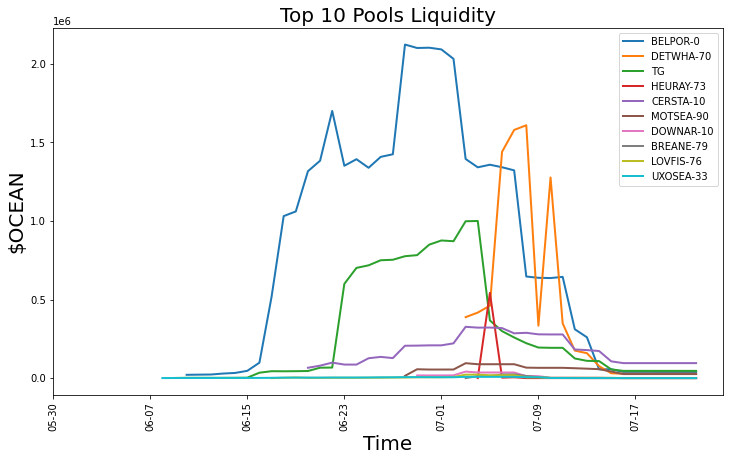

In [16]:
# plot each pool historical data
fig, ax = plt.subplots()
for pool in df_pools_sorted['id'][:10]:
    df = df_pools.loc[df_pools['id'] == pool]
    if df['datatoken.name'].unique()[0] is np.nan:
        datatoken_name = df['datatoken.name'].unique()[1]
    else:
        datatoken_name = df['datatoken.name'].unique()[0]

    if df['datatoken.symbol'].unique()[0] is np.nan:
        datatoken_symbol = df['datatoken.symbol'].unique()[1]
    else:
        datatoken_symbol = df['datatoken.symbol'].unique()[0]
    
    x = pd.to_datetime(df["timestamp"], unit='s').dt.strftime('%m-%d')

    y = df['baseTokenLiquidity'].astype(float)
    plt.plot(x, y, label = f'{datatoken_symbol}', linewidth=2)

plt.xlabel("Time", fontsize=20)
plt.ylabel("$OCEAN", fontsize=20)
plt.title(f"Top 10 Pools Liquidity", fontsize=20)
plt.xticks(rotation=30)
plt.legend(fontsize=10)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)